# **1. Import libraries**

In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import time

colors = ["#581845", "#900C3F", "#C70039", "#8E44AD", "#6C3483", "#943126", "#4A235A", "#7D3C98", "#A93226", "#76448A", "#512E5F","#BB8FCE", "#A569BD", "#922B21", "#5D6D7E"]

c:\Users\ACER\ANA\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# **2. Dataset loading & first look**

In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [8]:
df.duplicated().sum()

0

Conclusion:
- The data set has 8807 rows and 12 columns.
- show_id and description columns can be dropped due to low data value.
- Null values appear in director, cast, country, date_added, rating and duration columns.
- There is no full duplicate in the dataset.

# **3. Data cleaning**

### **- Clean country column**

In [9]:
df['country'].isna().sum()

831

In [10]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['country'] = df['country'].astype(str)
df['country'] = df['country'].apply(lambda x : x.split(', ')[0])

In [11]:
df['country'].value_counts()

country
United States     4041
India             1008
United Kingdom     626
Canada             271
Japan              259
                  ... 
Namibia              1
Senegal              1
Cameroon             1
Syria                1
Somalia              1
Name: count, Length: 89, dtype: int64

### **- Clean rating column**

In [12]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [13]:
df['rating'] = df['rating'].replace({'74 min': np.nan, '84 min': np.nan, '66 min': np.nan, 'TV-Y7-FV': 'TV-Y7'})
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'UR'], dtype=object)

### **- Clean director and cast columns**

In [14]:
df['director'].isnull().sum()

2634

In [15]:
df['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [16]:
null_percent = df.isnull().sum() * 100 / df.shape[0]
null_percent.round(2).sort_values(ascending = False)

director       29.91
cast            9.37
date_added      0.11
rating          0.08
duration        0.03
show_id         0.00
type            0.00
title           0.00
country         0.00
release_year    0.00
listed_in       0.00
description     0.00
dtype: float64

### **- Fill null values in all columns**

In [17]:
#Fill null values with a new category

df['director'].fillna('Unknown', inplace = True)
df['cast'].fillna('Unknown', inplace = True)

In [18]:
#Fill null values with mode

mode_im = ['date_added', 'rating', 'duration']
for i in mode_im:
    df[i] = df[i].fillna(df[i].mode()[0])

In [19]:
df['month'] = df['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
df['year'] = df['date_added'].apply(lambda x : x.split(', ')[-1])

In [20]:
#Drop useless columns

df.drop(['show_id', 'date_added', 'description'], axis = 1, inplace = True)
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
month           0
year            0
dtype: int64

In [21]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,month,year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,September,2021
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV",September,2021
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September,2021


# **4. Visualization**

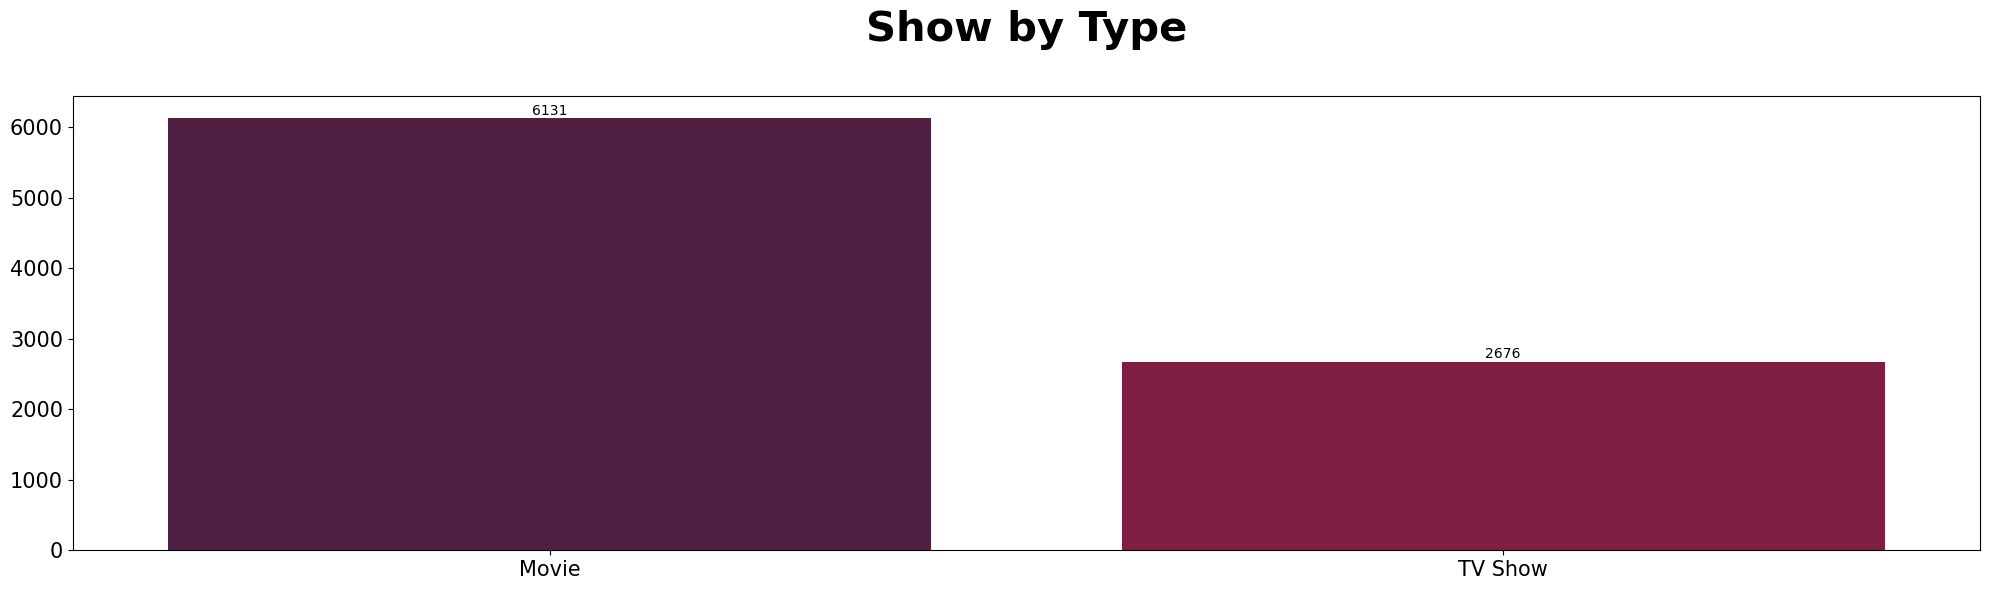

In [22]:
#Show by type

plt.figure(figsize = (20, 6))
ax = sns.countplot(x = 'type', data = df, palette = colors)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Show by Type\n', fontsize = 30, fontweight = 'bold')
plt.tight_layout()
plt.show()

The chart shows a clear dominance of movies (6,131) over TV shows (2,676), indicating an uneven distribution in the dataset. This could reflect the dataset's focus on movies, with TV shows making up a smaller portion.

In [23]:
#Release density

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
db = df.groupby('year')['month'].value_counts().unstack()[month_order]

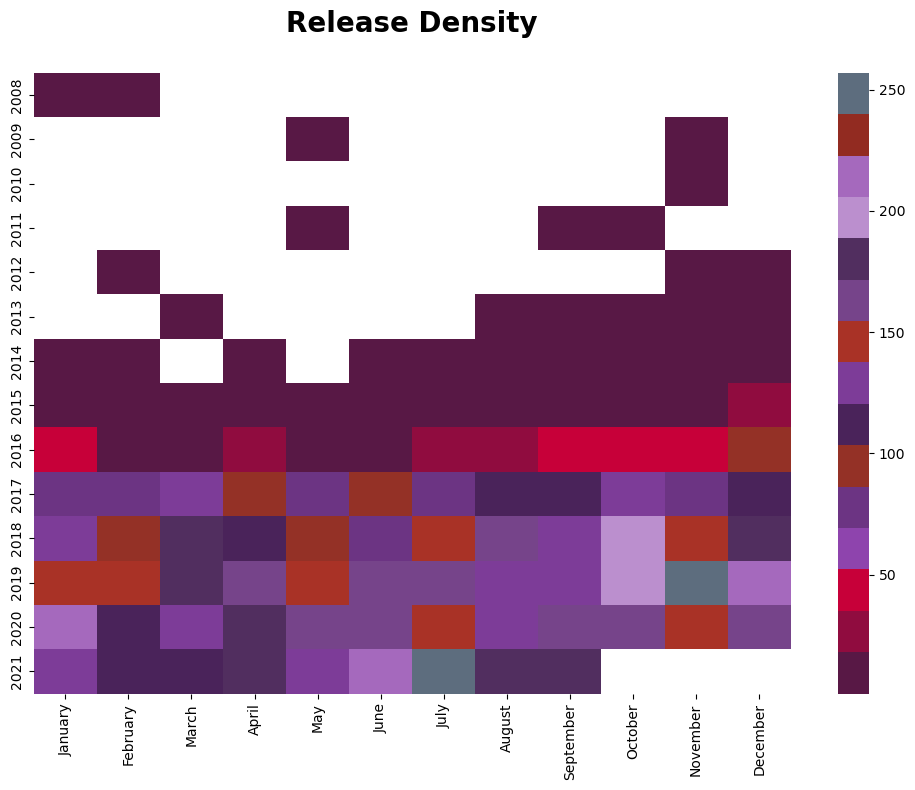

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax = sns.heatmap(db, cmap = colors)
plt.title('Release Density\n', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [25]:
#What is the top genre for movies/TV shows?

movies_df = df[df['type'] == 'Movie']
genres = {}
for genre in movies_df['listed_in']:
    for i in genre.split(','):
        i = i.strip()
    if i not in genres:
        genres[i] = 1
    else:
        genres[i] += 1
movies = pd.DataFrame(list(genres.items()), columns = ['Genre', 'Number of Movies'])
movies.sort_values(by = 'Number of Movies', ascending = False).head()

,Genre,Number of Movies
2,International Movies,1789
6,Romantic Movies,600
5,Thrillers,577
0,Documentaries,383
4,Comedies,374


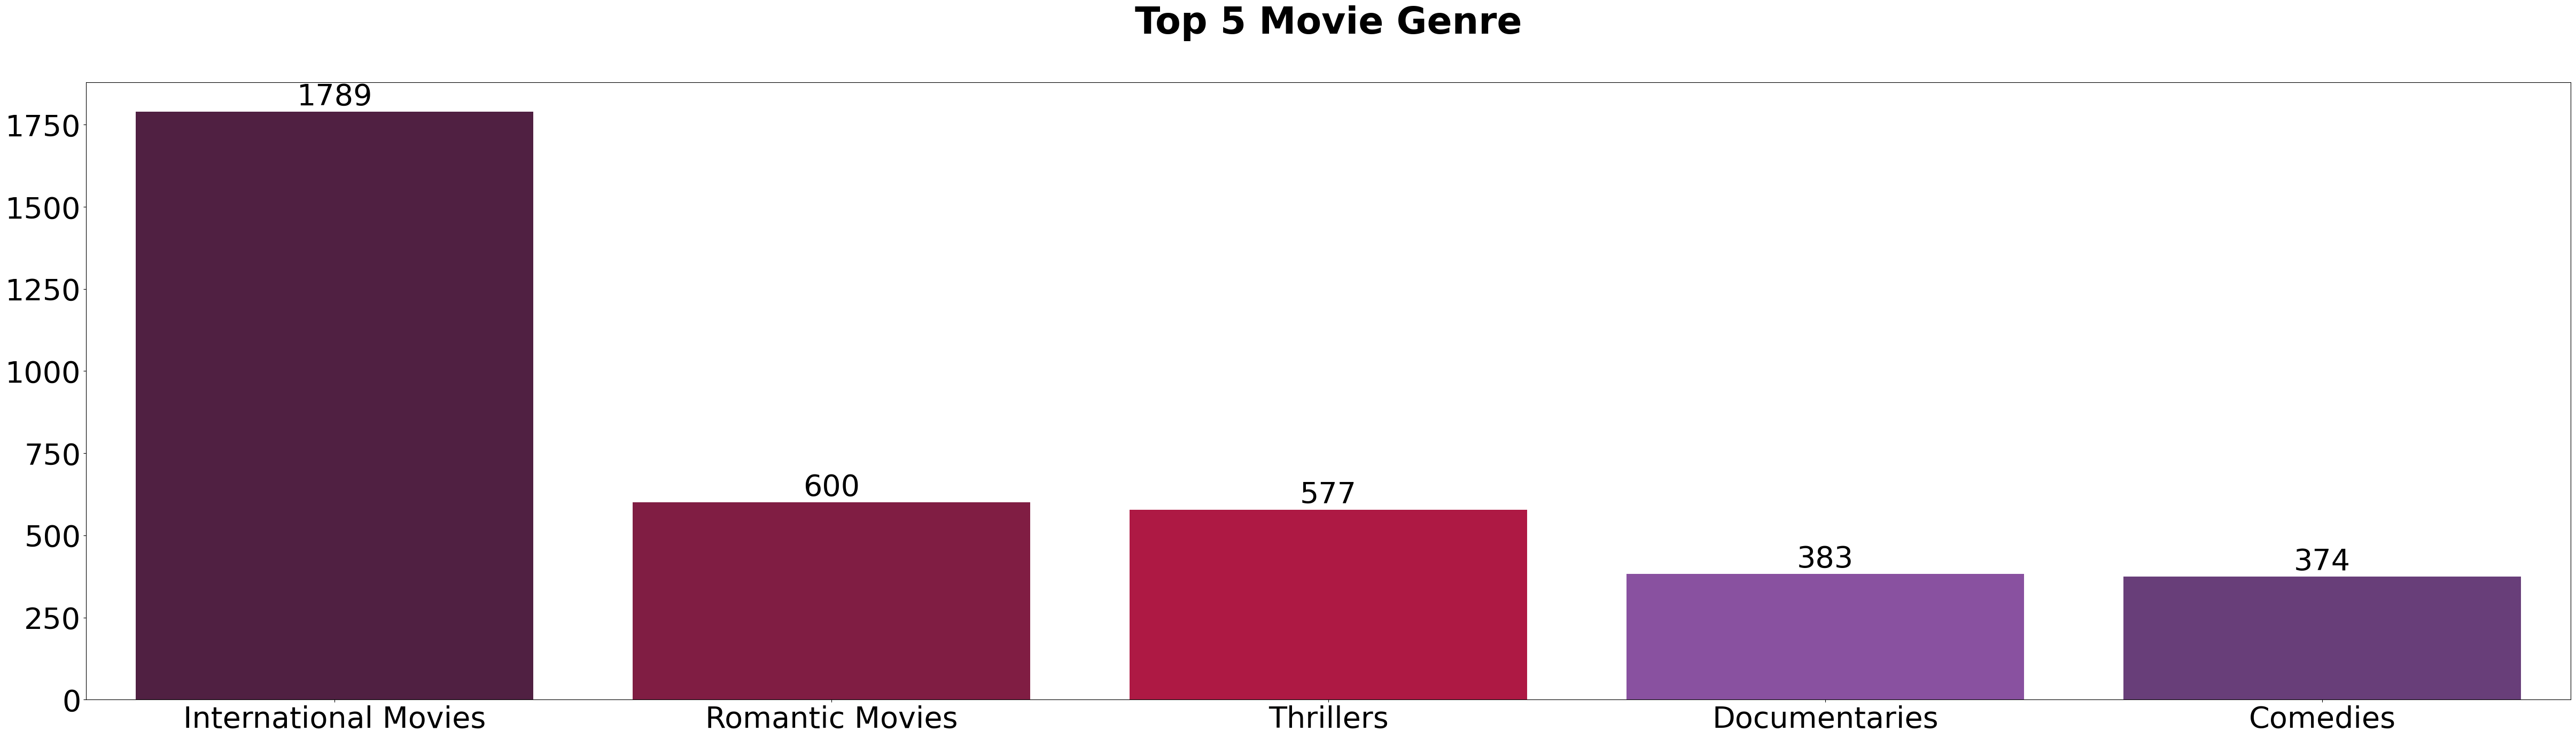

In [26]:
fig, ax = plt.subplots(figsize = (60, 15))
ax = sns.barplot(x = 'Genre', y = 'Number of Movies', data = movies.sort_values('Number of Movies', ascending = False).iloc[:5], palette = colors)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black', fontsize = 40)
    ax.tick_params(axis = 'both', labelsize = 40)
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Top 5 Movie Genre\n', fontsize = 50, fontweight = 'bold')
plt.show()

The top movie genre is international movie.

In [27]:
show_df = df[df['type'] == 'TV Show']
genres2 = {}
for genre in show_df['listed_in']:
    for i in genre.split(','):
        i = i.strip()
    if i not in genres2:
        genres2[i] = 1
    else:
        genres2[i] += 1
shows = pd.DataFrame(list(genres2.items()), columns = ['Genre', 'Number of Shows'])
shows.sort_values('Number of Shows', ascending = False).head()

,Genre,Number of Shows
6,TV Dramas,598
3,TV Comedies,450
8,Kids' TV,265
4,International TV Shows,224
2,Reality TV,198


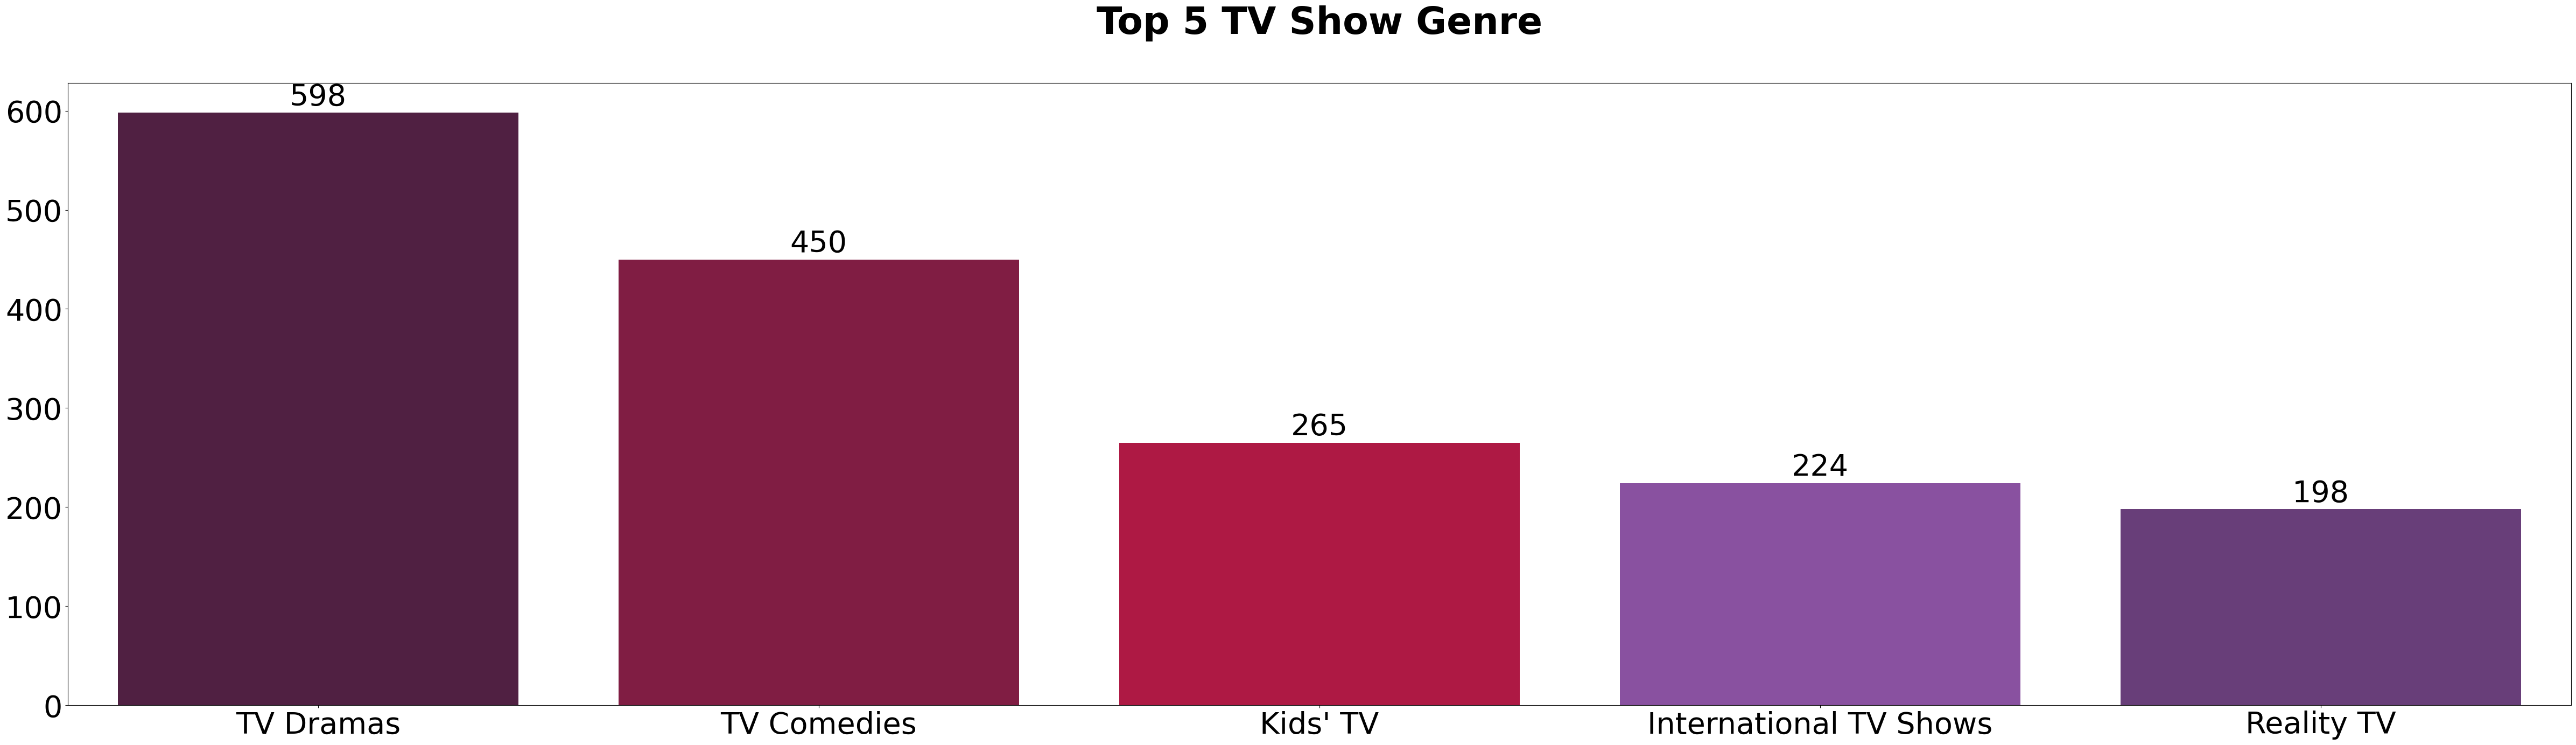

In [28]:
fig, ax = plt.subplots(figsize = (60, 15))
ax = sns.barplot(x = 'Genre', y = 'Number of Shows', data = shows.sort_values('Number of Shows', ascending = False).iloc[:5], palette = colors)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black', fontsize = 40)
    ax.tick_params(axis = 'both', labelsize = 40)
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Top 5 TV Show Genre\n', fontsize = 50, fontweight = 'bold')
plt.show()

The top show genre is TV dramas.

In [29]:
#The year with the largest release of movies/TV shows

pp = df.groupby('release_year')['type'].value_counts().unstack(level = -1)
pp

type,Movie,TV Show
release_year,,
1925,NaN,1.00
1942,2.00,NaN
1943,3.00,NaN
1944,3.00,NaN
1945,3.00,1.00
...,...,...
2017,767.00,265.00
2018,767.00,380.00
2019,633.00,397.00


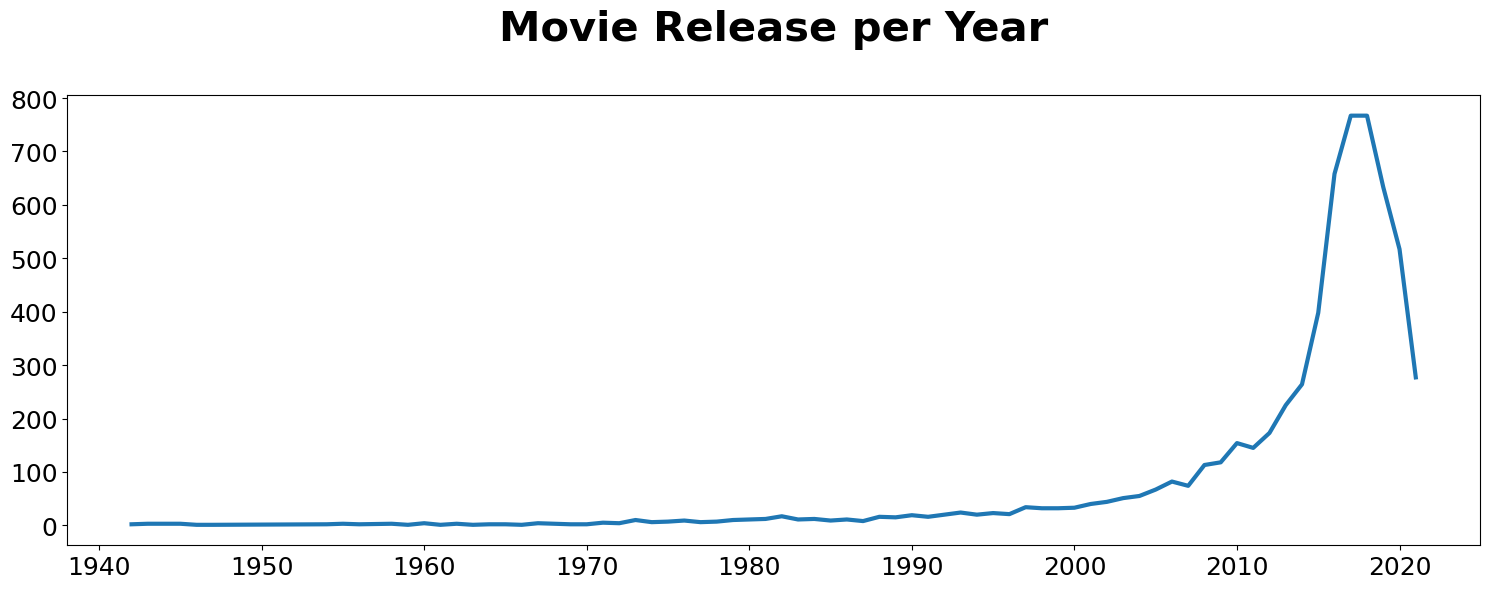

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
ax = sns.lineplot(x = 'release_year', y = 'Movie', data = pp, linewidth = 3)
plt.tick_params(labelsize = 18)
plt.title('Movie Release per Year\n', fontsize = 30, fontweight = 'bold')
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

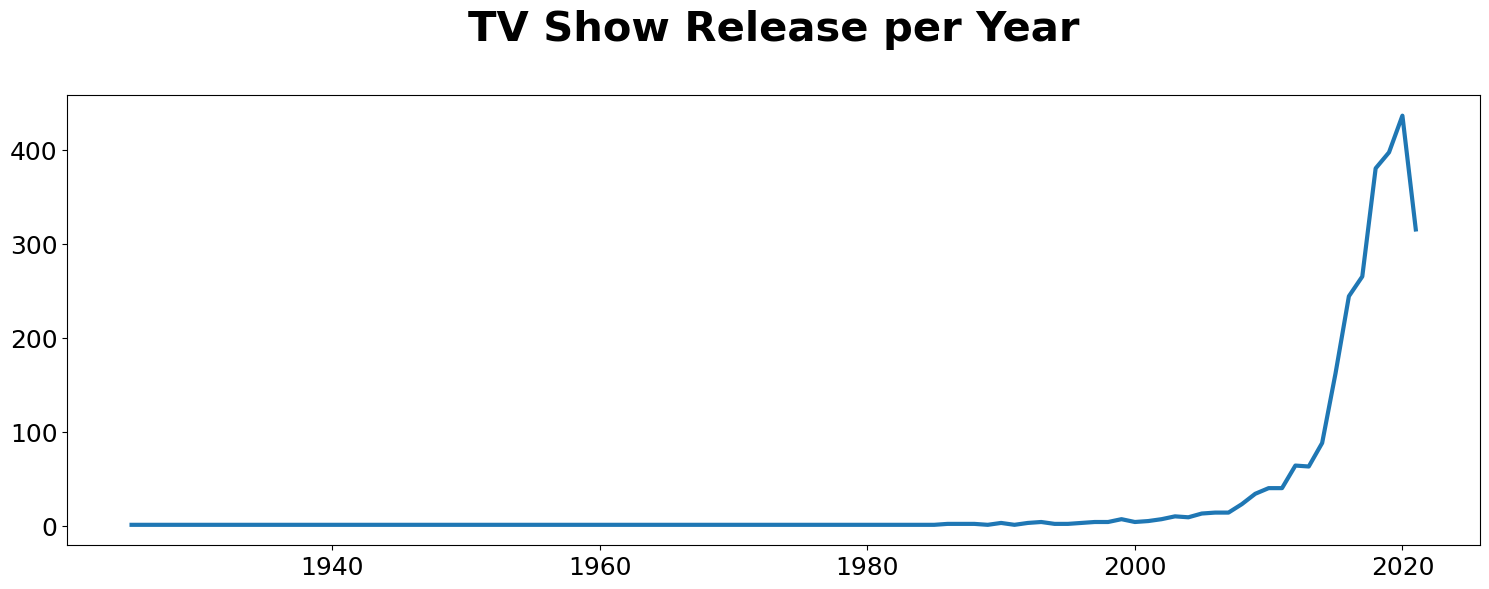

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
ax = sns.lineplot(x = 'release_year', y = 'TV Show', data = pp, linewidth = 3)
plt.tick_params(labelsize = 18)
plt.title('TV Show Release per Year\n', fontsize = 30, fontweight = 'bold')
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

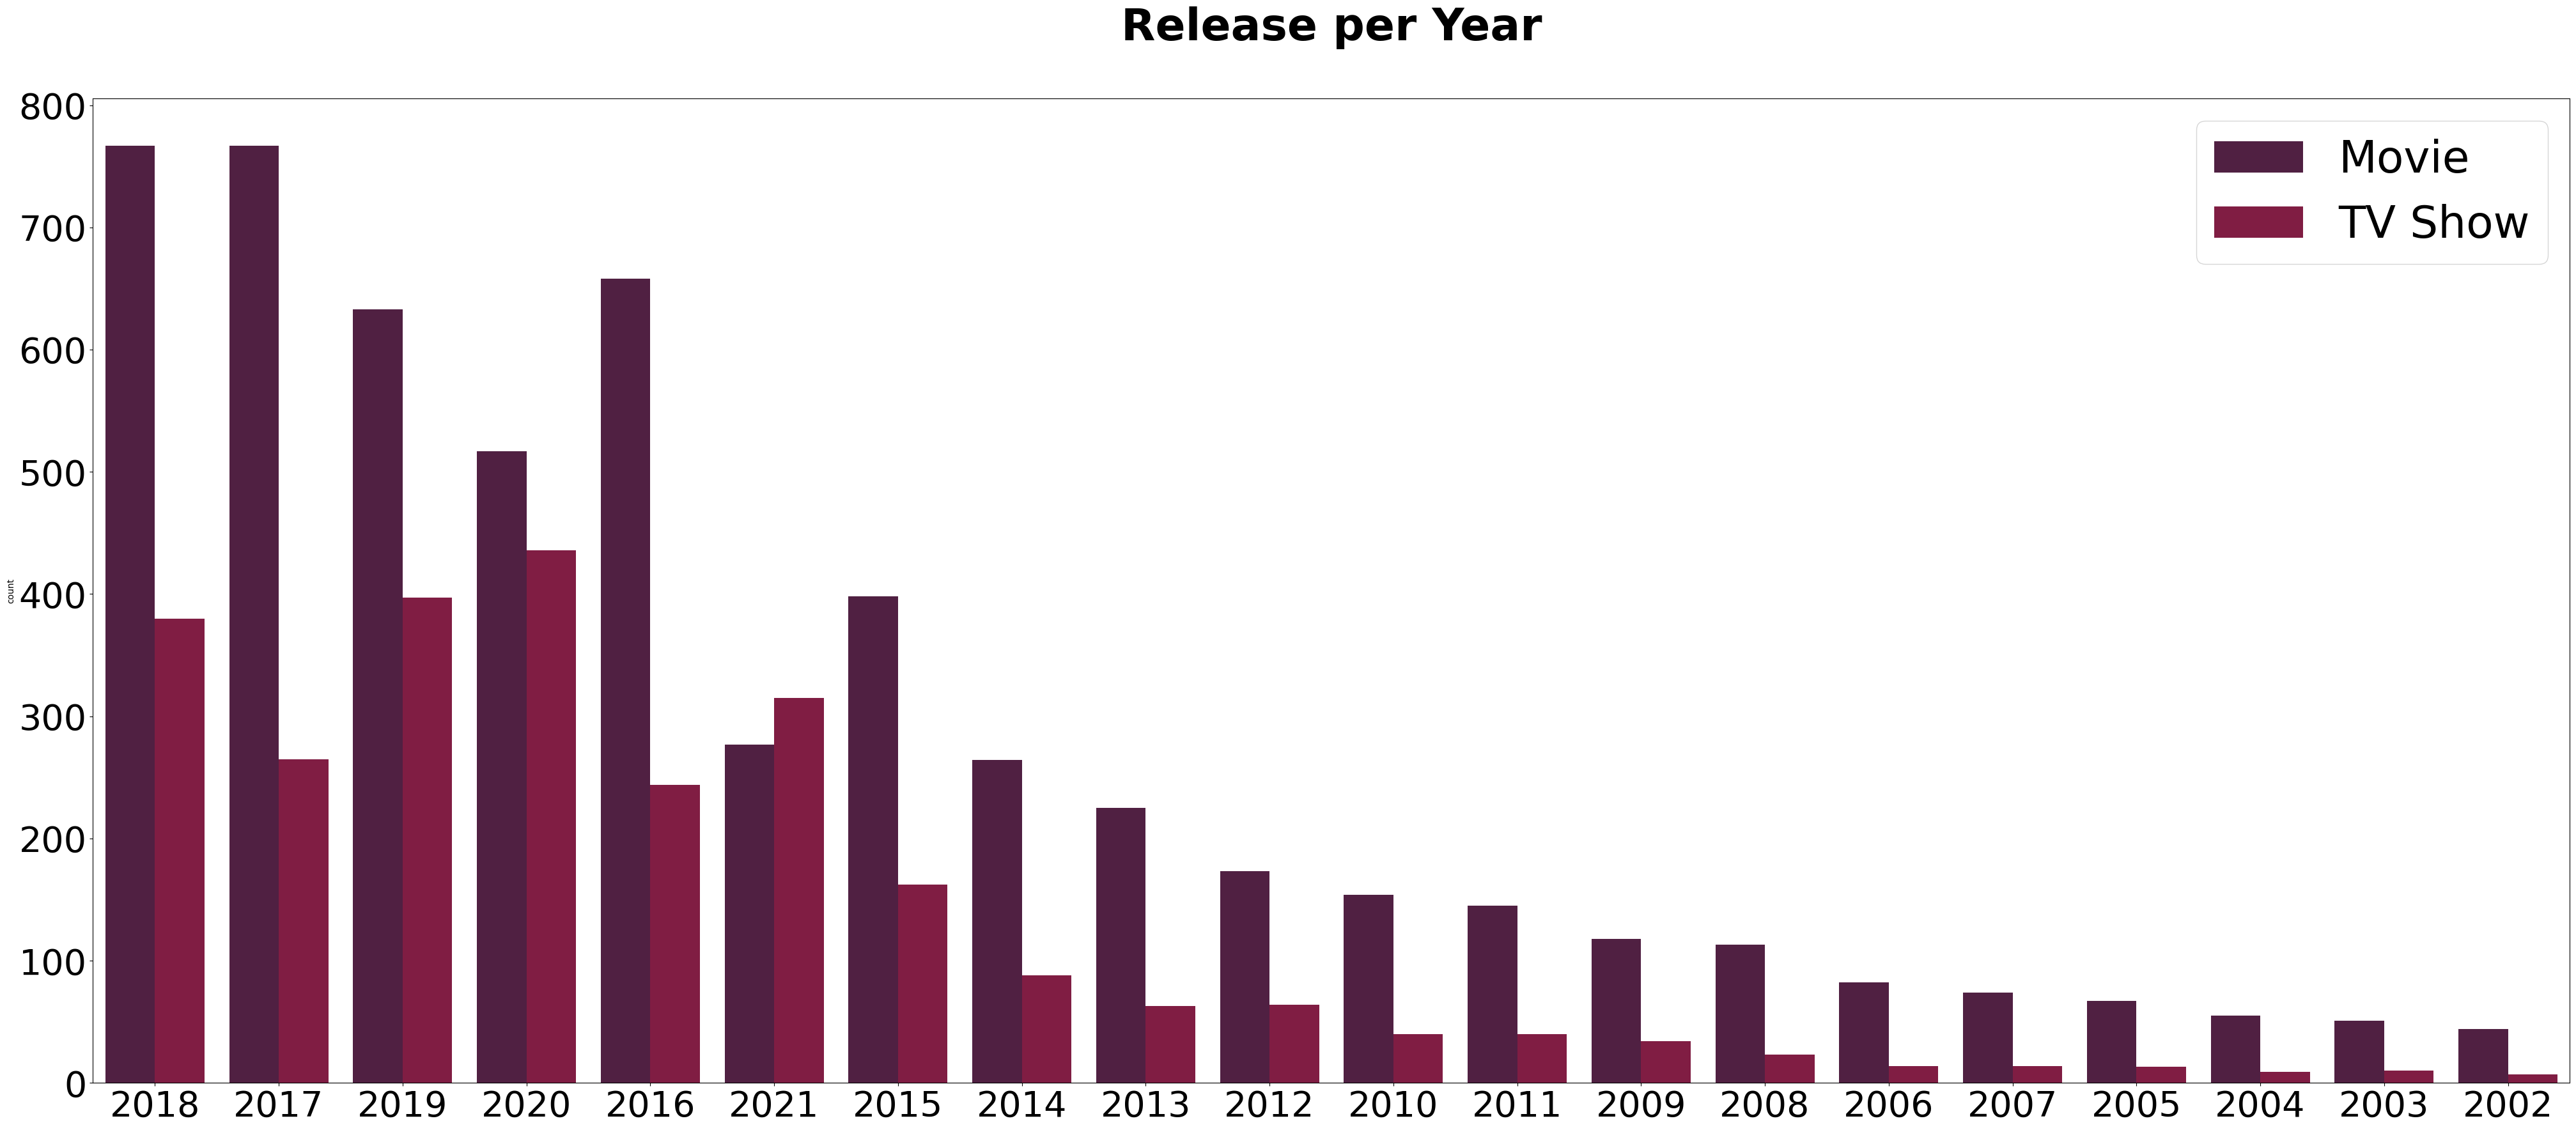

In [32]:
fig, ax = plt.subplots(figsize = (50, 20))
y = sns.countplot(x = 'release_year', data = df, palette = colors, hue = 'type', order = df['release_year'].value_counts().index[0:20])
plt.tick_params(labelsize = 40)
y.set_xlabel('')
plt.title('Release per Year\n', fontsize = 50, fontweight = 'bold')
y.legend(fontsize = 50)
plt.show()

Movies were released the most in 2018.
TV shows were released the most in 2020.

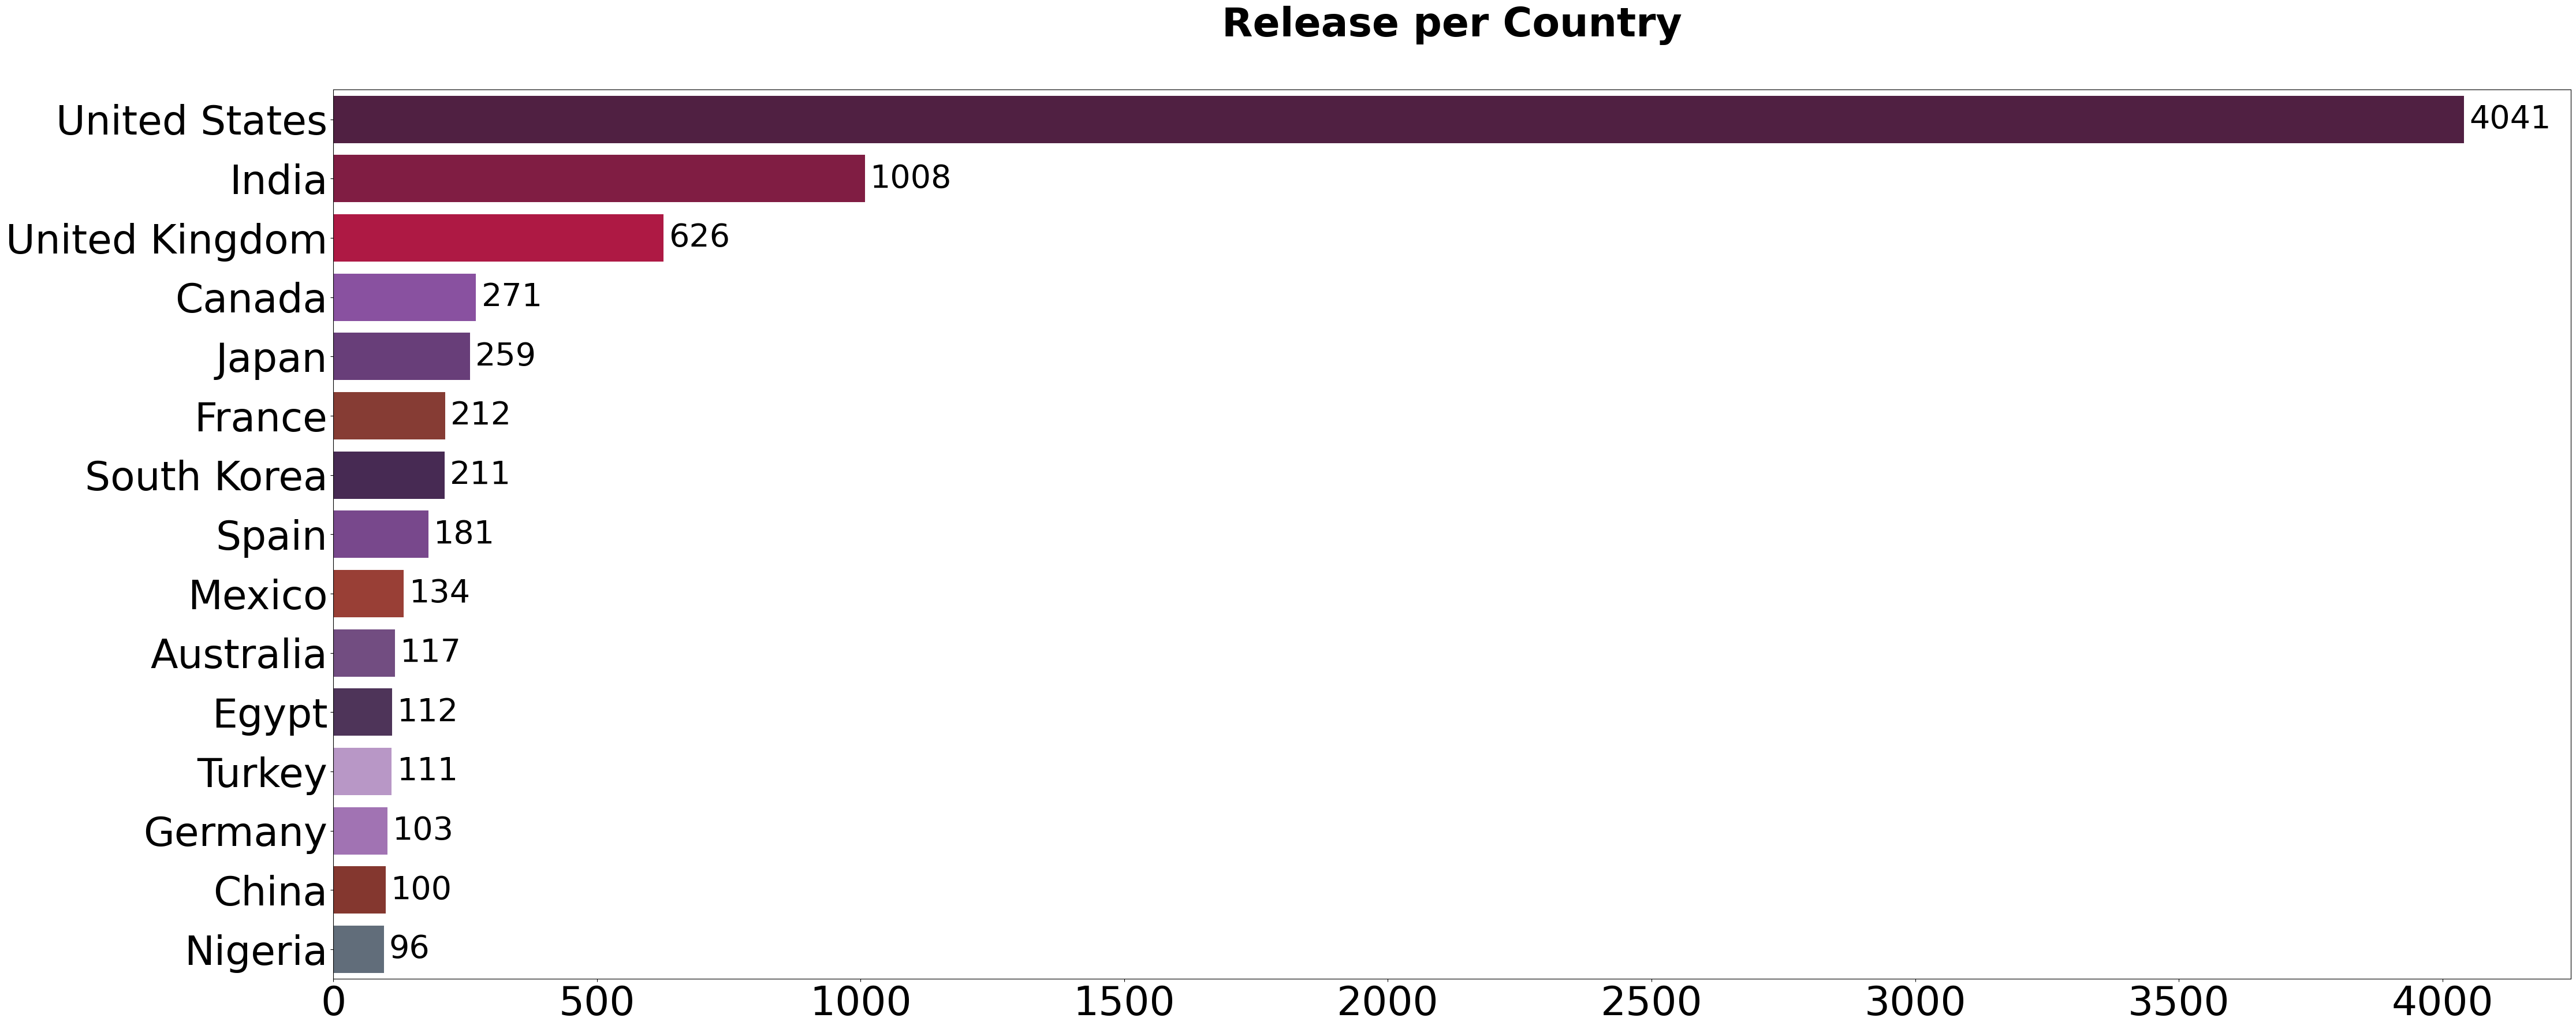

In [33]:
#Which country has the most release?

fig, ax = plt.subplots(figsize = (50, 20))
ax = sns.countplot(y = 'country', data = df, palette = colors, order = df['country'].value_counts().index[:15])
ax.set_xlabel('')
ax.set_ylabel('')
for p in ax.patches:
    ax.annotate(int(p.get_width()), (p.get_width() + 10, p.get_y() + p.get_height() / 2), ha = 'left', va = 'center', color = 'black', fontsize = 40)
    ax.tick_params(axis = 'both', labelsize = 50)
plt.title('Release per Country\n', fontsize = 50, fontweight = 'bold')
plt.show()

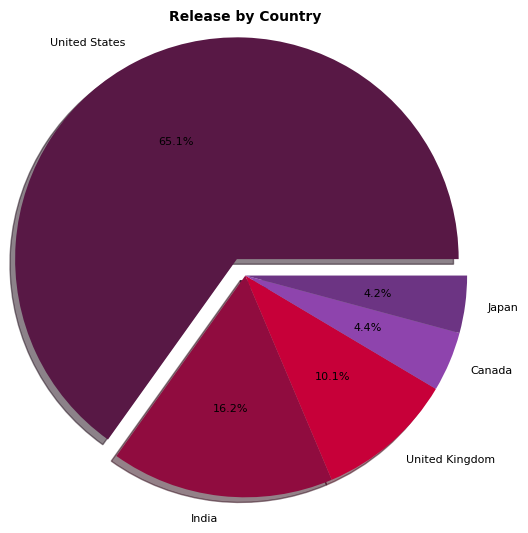

In [34]:
z = np.zeros(748)
z[0] = 0.1
fig, ax = plt.subplots(figsize = (6, 6))
ax.pie(df['country'].value_counts()[:5], explode = z[:5], labels = df['country'].value_counts()[:5].index.tolist(), radius = 1.2, shadow = True, textprops = {'fontsize': 8, 'color': 'black'}, colors = colors, autopct = '%1.1f%%')
plt.title('Release by Country\n', fontsize = 10, fontweight = 'bold')
plt.show()

United States released the most number of movies and TV shows.

In [35]:
#What is the range of duration to movies/TV shows?

movies_df['duration'] = movies_df['duration'].str.replace('min', ' ').str.replace('Season', ' ').str.strip()
movies_df['duration'] = movies_df['duration'].astype('int32')

In [36]:
duration_min = movies_df[movies_df['duration'] > 1]

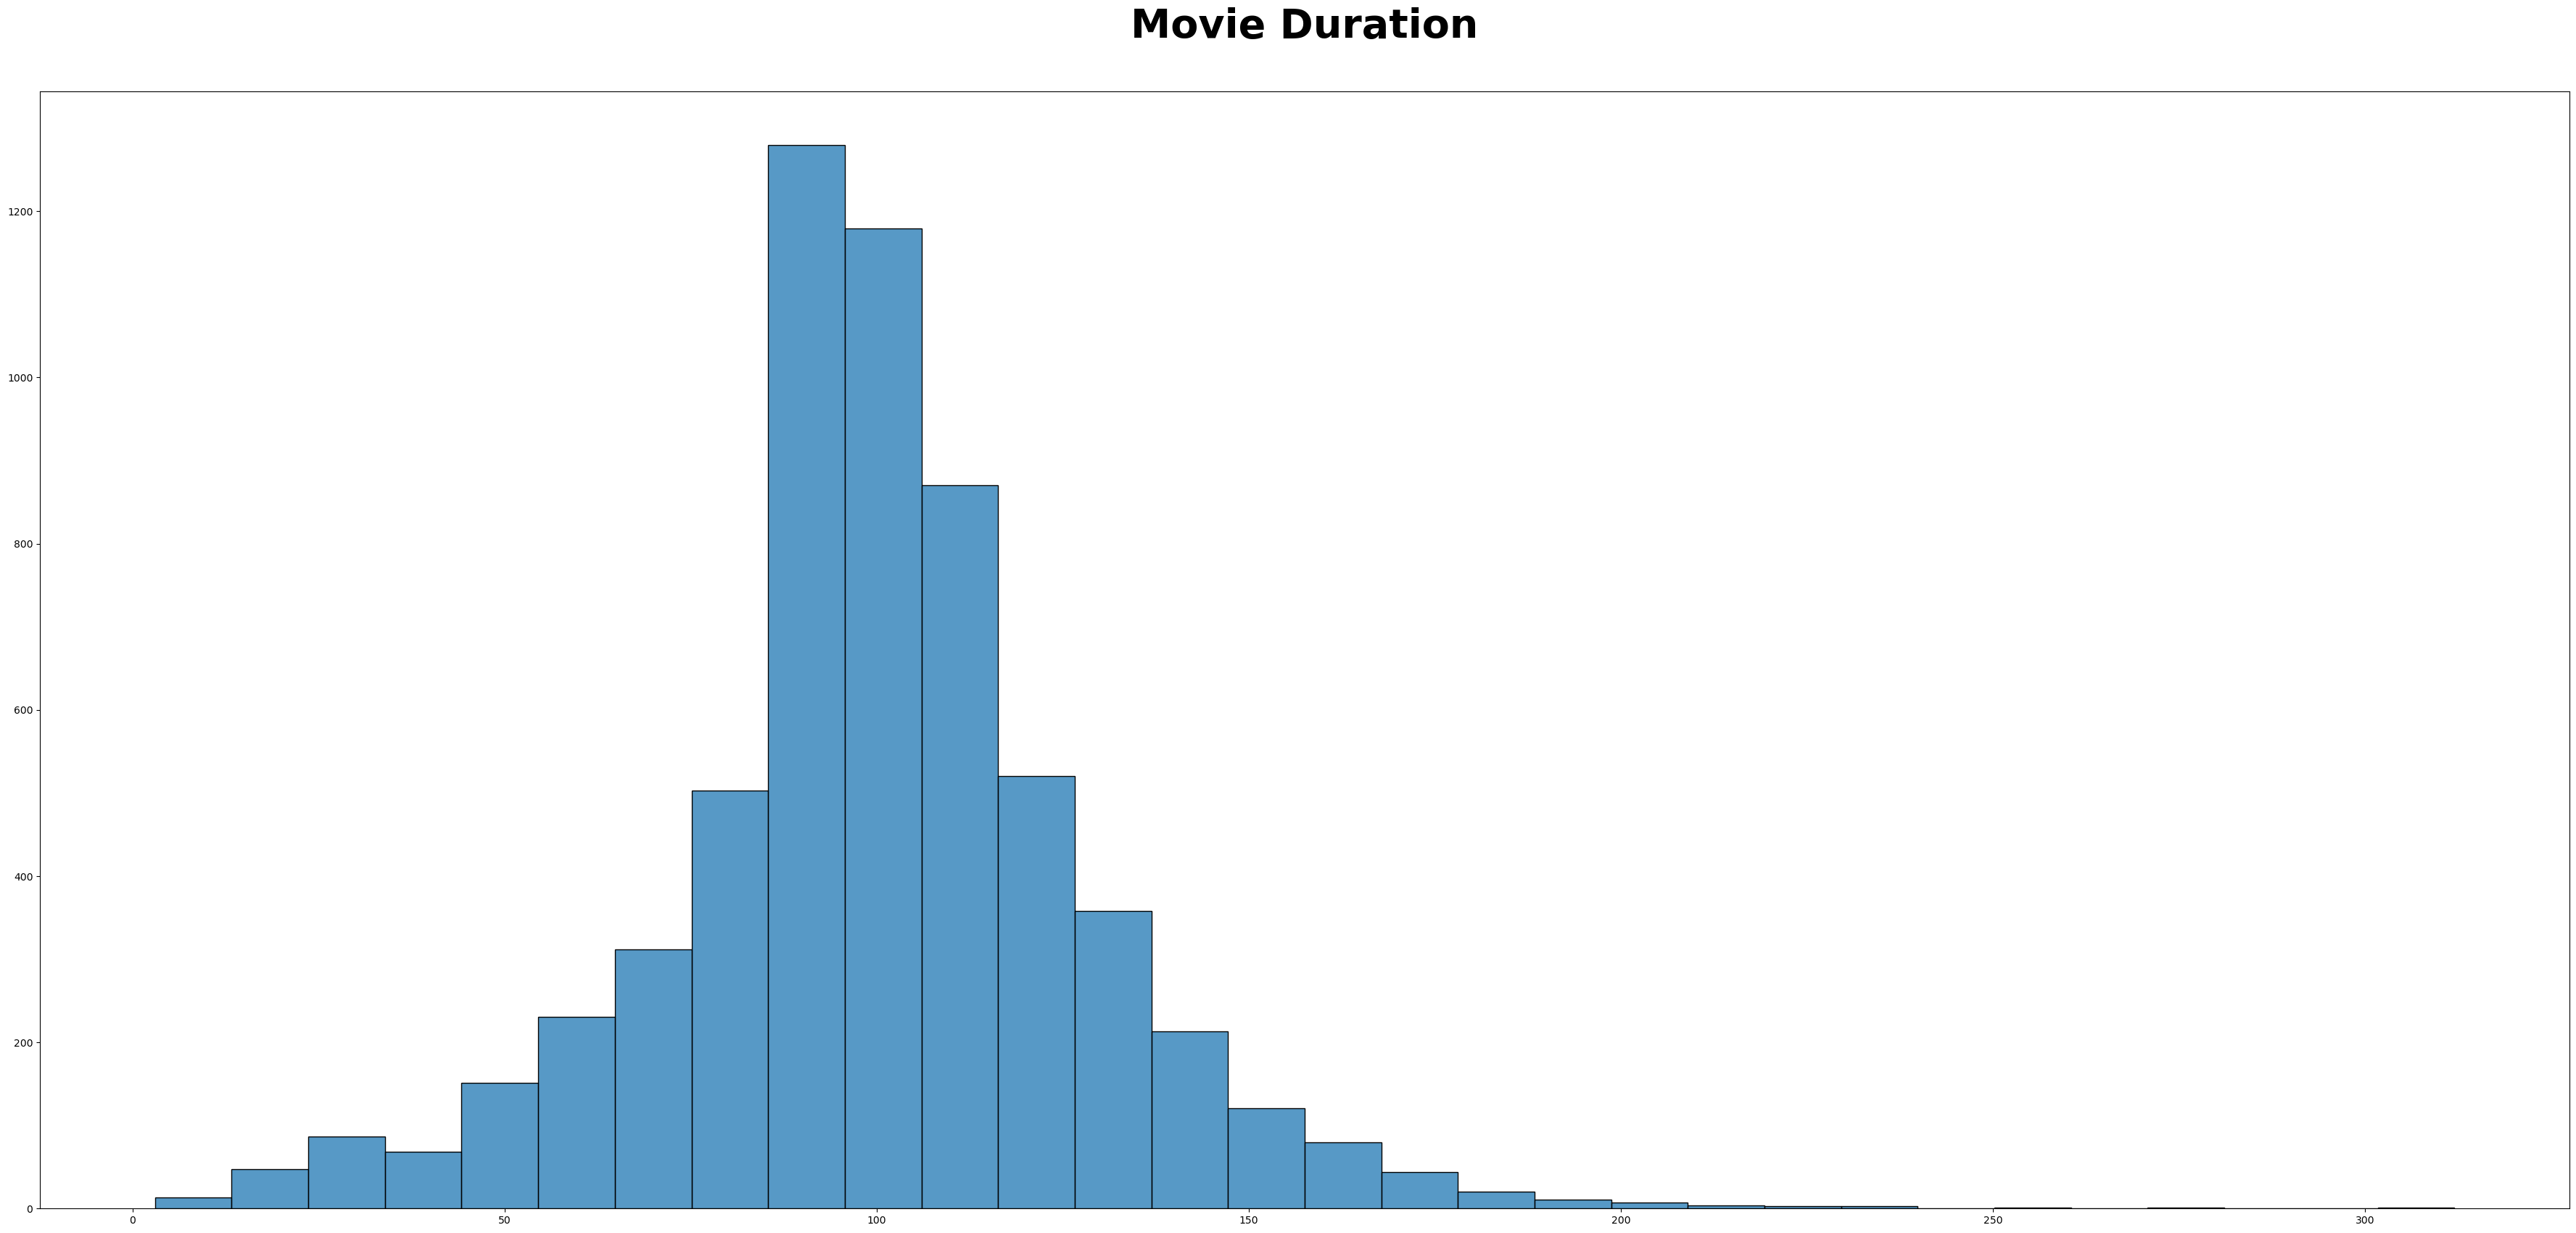

In [37]:
plt.figure(figsize = (45, 20))
ax = sns.histplot(x = duration_min['duration'], data = duration_min, bins = 30, palette = colors)
plt.title('Movie Duration\n', fontsize = 40, fontweight = 'bold')
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

Movie duration range is around 90 - 100 mins.

In [38]:
show_df['duration'] = show_df['duration'].str.replace('Seasons', ' ').str.replace('Season', ' ').str.strip()
show_df['duration'] = show_df['duration'].astype('int32')

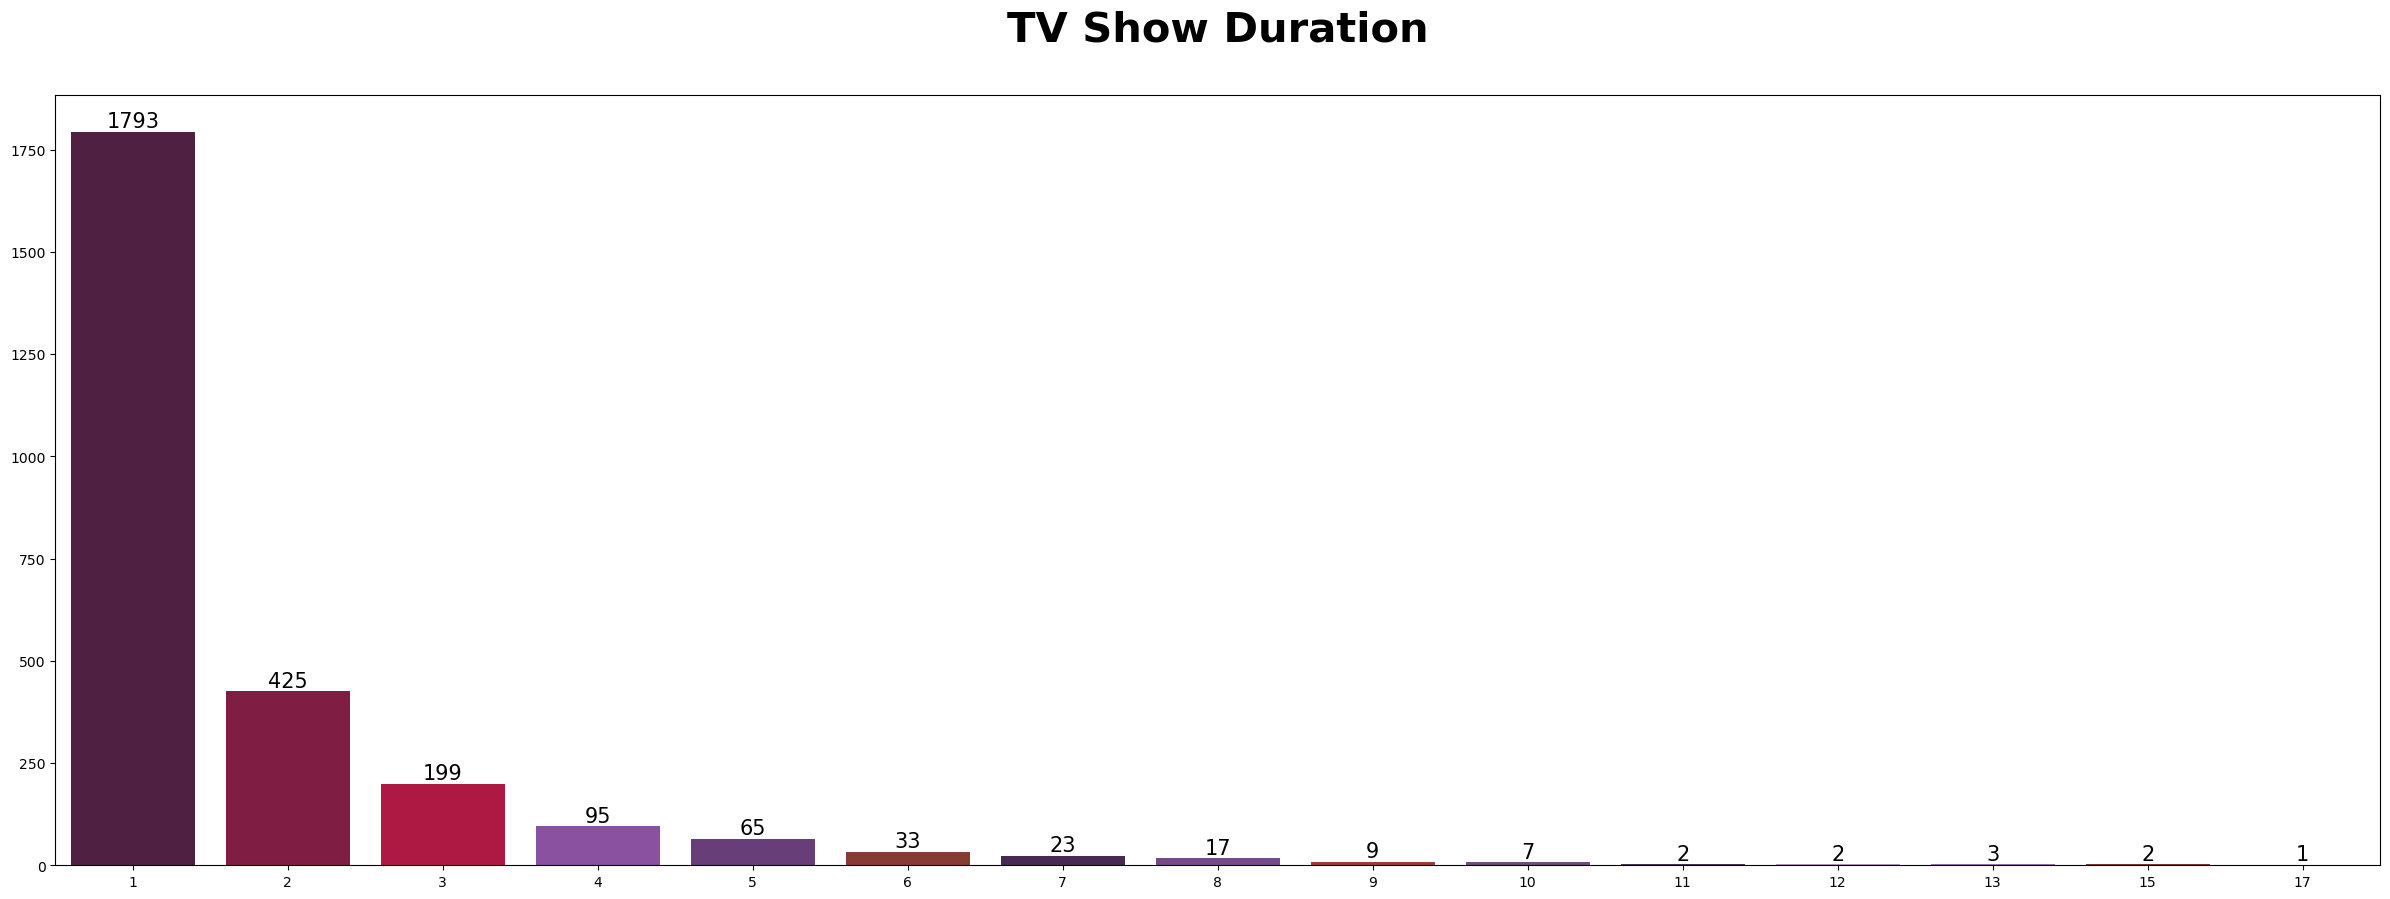

In [39]:
plt.figure(figsize = (30, 10))
ax = sns.countplot(x = show_df['duration'], data = show_df, palette = colors)
plt.title('TV Show Duration\n', fontsize = 30, fontweight = 'bold')
ax.set_xlabel('')
ax.set_ylabel('')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black', fontsize = 15)
plt.show()

Most TV shows are 1 season.

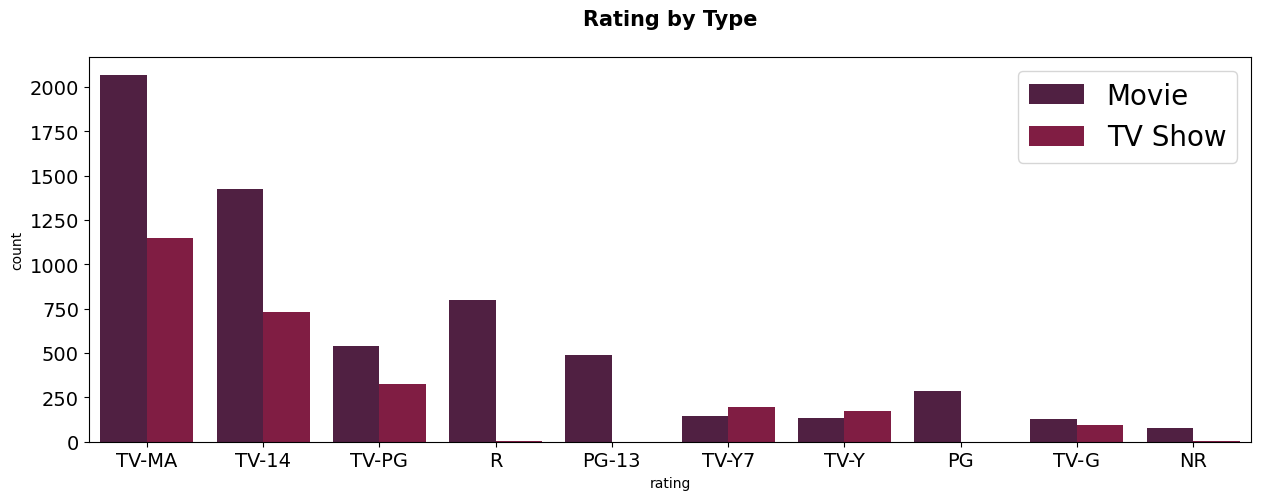

In [42]:
#What is the most popular rating in movies/TV shows?

fig, ax = plt.subplots(1, 1, figsize = (15, 5))
plt.tick_params(labelsize = 14)
ax = sns.countplot(x = 'rating', data = df, palette = colors, hue = 'type', order = df['rating'].value_counts().index[:10])
plt.legend(fontsize = 20)
plt.title('Rating by Type\n', fontsize = 15, fontweight = 'bold')
plt.show()

For movies and TV shows the most popular rating is TV-MA.

In [43]:
#What is the TV show with the most seasons?

show_df[['duration', 'title']].sort_values('duration', ascending = False).head(5)

,duration,title
548,17,Grey's Anatomy
2423,15,Supernatural
4798,15,NCIS
1354,13,Heartland
4220,13,COMEDIANS of the world


Grey's Anatomy is the TV show that has the highest number of seasons.